In [4]:
import numpy as np 

A = np.asmatrix('[1,2;2,3]')
A

matrix([[1, 2],
        [2, 3]])

In [5]:
A.T

matrix([[1, 2],
        [2, 3]])

In [6]:
A.I

matrix([[-3.,  2.],
        [ 2., -1.]])

In [7]:
b = np.asmatrix('[1,2]')
b

matrix([[1, 2]])

In [8]:
A*b.T

matrix([[5],
        [8]])

In [17]:
from scipy import linalg

A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [18]:
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [19]:
b = np.array([[5,6]])
b

array([[5, 6]])

In [20]:
b.T

array([[5],
       [6]])

In [24]:
b.shape

(1, 2)

In [23]:
A*b.T  #not matrix multiplication but each row element of A is multiplied by row element of B.

array([[ 5, 10],
       [18, 24]])

In [22]:
A.dot(b.T)   #matrix multiplication

array([[17],
       [39]])

In [36]:
c = np.array([5,6])
c.shape

(2,)

In [32]:
c.T  #doesnot work for 1d array

array([5, 6])

In [40]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])

linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [42]:
A.dot(linalg.inv(A))

#all diagonal are 1 and other elements are almost zero, so identity matrix is the desired result

array([[ 1.00000000e+00, -1.11022302e-16, -5.55111512e-17],
       [ 3.05311332e-16,  1.00000000e+00,  1.87350135e-16],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [51]:
b = np.array([[1],[2],[3]])
b.shape

(3, 1)

In [56]:
import time
now = time.time()
calc = linalg.inv(A).dot(b)
end = time.time()-now
print(calc)
print(end)

[[ 1.88]
 [-0.36]
 [ 0.04]]
0.0


In [57]:
import time
now = time.time()
calc = np.linalg.solve(A, b)
end = time.time()-now
print(calc)
print(end)

[[ 1.88]
 [-0.36]
 [ 0.04]]
0.0


Determinant and Norms

In [46]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])

linalg.inv(A).dot(A)

array([[1.00000000e+00, 4.44089210e-16, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 4.44089210e-16],
       [1.38777878e-17, 0.00000000e+00, 1.00000000e+00]])

In [45]:
det = linalg.det(A)
det

-25.000000000000004

In [59]:
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [60]:
#norms

linalg.norm(A) , linalg.norm(A,'fro')  #default fro is frobenius norm

(11.916375287812984, 11.916375287812984)

In [61]:
linalg.norm(A,1)  #L1 norm, max column sum

14.0

In [62]:
linalg.norm(A,-1) #L1 norm , min column sum

5.0

In [63]:
linalg.norm(A,np.inf) #L inf norm , max row sum

13.0

In [64]:
linalg.norm(A,-np.inf) #L inf norm , min row sum

8.0

Solving linear least-squares problems and pseudo-inverses 
![alt text](figures/least_square.png)

In [65]:
rng = np.random.default_rng(seed=42)
c1,c2 = 5.0,2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05*max(yi) * rng.standard_normal(len(yi))

In [66]:
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c,resid,rank,sigma = linalg.lstsq(A,zi)

In [67]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

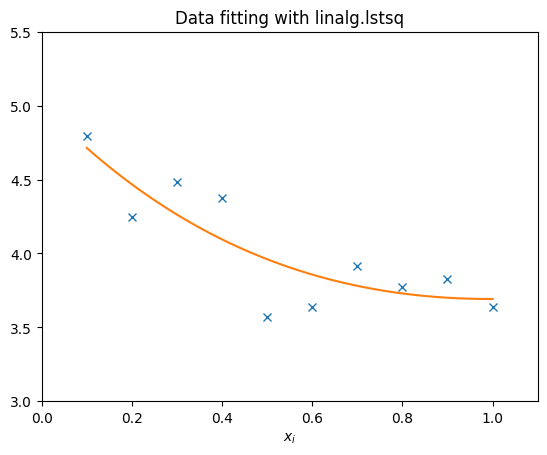

In [69]:
import matplotlib.pyplot as plt

plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()